In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import seaborn as sns

In [2]:
df_caqueta=pd.read_csv('D:\estadisticas\data_sets\caqueta_precipitacion.csv')
df_caqueta

C:\Users\lukas\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 11:00,0.0,50,NaN,900
1,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 12:00,0.0,50,NaN,900
2,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 13:00,0.0,50,NaN,900
3,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 14:00,0.0,50,NaN,900
4,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 15:00,0.0,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130819,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-29 07:00,91.0,50,NaN,900
130820,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-29 13:00,72.0,50,NaN,900
130821,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-30 07:00,95.0,50,NaN,900
130822,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-30 13:00,86.0,50,NaN,900


In [3]:
df_caqueta.shape

(130824, 21)

In [4]:
df_caqueta['Fecha']=pd.to_datetime(
    df_caqueta['Fecha'],
    format ='%Y/%m/%d %H:%M'
)

In [5]:
df_caqueta.dtypes

CodigoEstacion               int64
NombreEstacion              object
Latitud                    float64
Longitud                   float64
Altitud                      int64
Categoria                   object
Entidad                     object
AreaOperativa               object
Departamento                object
Municipio                   object
FechaInstalacion            object
FechaSuspension            float64
IdParametro                 object
Etiqueta                    object
DescripcionSerie            object
Frecuencia                  object
Fecha               datetime64[ns]
Valor                      float64
Grado                        int64
Calificador                 object
NivelAprobacion              int64
dtype: object

In [6]:
df_caqueta

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,...,FechaSuspension,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 11:00:00,0.0,50,NaN,900
1,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 12:00:00,0.0,50,NaN,900
2,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 13:00:00,0.0,50,NaN,900
3,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 14:00:00,0.0,50,NaN,900
4,44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,...,NaN,PRECIPITACION,PT_10_TT_H,Precipitación total horaria (sensor medición c...,Horaria,2017-01-01 15:00:00,0.0,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130819,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-29 07:00:00,91.0,50,NaN,900
130820,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-29 13:00:00,72.0,50,NaN,900
130821,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-30 07:00:00,95.0,50,NaN,900
130822,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,...,NaN,HUM RELATIVA,HR_CAL,Húmeda relativa calculada horaria,Horaria,2019-06-30 13:00:00,86.0,50,NaN,900


In [7]:
df_parametro=df_caqueta.set_index('DescripcionSerie')
df_parametro

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,,,
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-01-01 11:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-01-01 12:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-01-01 13:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-01-01 14:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.725250,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-01-01 15:00:00,0.0,50,NaN,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2019-06-29 07:00:00,91.0,50,NaN,900
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2019-06-29 13:00:00,72.0,50,NaN,900
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2019-06-30 07:00:00,95.0,50,NaN,900


In [8]:
df_parametro.sample(10)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,,,
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2015-01-19 13:00:00,73.0,50,NaN,900
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2015-01-29 19:00:00,77.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2018-04-12 13:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-09-02 20:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-12-15 05:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2020-02-24 14:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-01-17 09:00:00,0.0,50,NaN,900
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2012-02-16 13:00:00,57.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-12-09 10:00:00,0.0,50,NaN,900


## precipitación del caqueta

In [9]:
idx_filtro=df_parametro['IdParametro'].isin(['PRECIPITACION']) # filtrado de precipitacion
idx_filtro

DescripcionSerie
Precipitación total horaria (sensor medición cada 10 minutos)     True
Precipitación total horaria (sensor medición cada 10 minutos)     True
Precipitación total horaria (sensor medición cada 10 minutos)     True
Precipitación total horaria (sensor medición cada 10 minutos)     True
Precipitación total horaria (sensor medición cada 10 minutos)     True
                                                                 ...  
Húmeda relativa calculada horaria                                False
Húmeda relativa calculada horaria                                False
Húmeda relativa calculada horaria                                False
Húmeda relativa calculada horaria                                False
Húmeda relativa calculada horaria                                False
Name: IdParametro, Length: 130824, dtype: bool

In [41]:
df_precipitacion=df_parametro[idx_filtro]
df_precipitacion.sample(10)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,,,
Precipitación total horaria (sensor medición cada 10 minutos),46015030,SAN VICENTE DEL CAGUAN - AUT [46015030],2.06300,-74.762694,300,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,30/09/2008 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2018-01-05 01:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2018-04-25 11:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2018-04-06 18:00:00,0.5,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-04-30 23:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-02-02 04:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-07-07 06:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035050,MACAGUAL - AUT [44035050],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,10/07/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2020-01-24 14:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035050,MACAGUAL - AUT [44035050],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,10/07/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-11-10 20:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035050,MACAGUAL - AUT [44035050],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,10/07/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-08-01 09:00:00,0.0,50,NaN,900


In [14]:
df_precipitacion.shape


(117753, 20)

In [15]:
w=df_precipitacion['Valor'].values
w= np.where(w==0.0,0.1,w)
w

array([0.1, 0.1, 0.1, ..., 0.1, 0.1, 0.1])

In [16]:
np.max(w)

320.8

In [17]:
Max=df_precipitacion[df_precipitacion['Valor']==32]
Max

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,,,
Precipitación total horaria (sensor medición cada 10 minutos),46015030,SAN VICENTE DEL CAGUAN - AUT [46015030],2.063,-74.762694,300,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,30/09/2008 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-04-17 01:00:00,32.0,50,NaN,900


In [18]:
# promedio
np.mean(w)

0.2392575985325215

In [19]:
#median
np.median(w)

0.1

In [20]:
Min=df_precipitacion[df_precipitacion['Valor']==0]
Min.sample(10)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,,,
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-05-14 14:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035050,MACAGUAL - AUT [44035050],1.50000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,10/07/2005 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2018-12-01 00:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),46015030,SAN VICENTE DEL CAGUAN - AUT [46015030],2.06300,-74.762694,300,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,30/09/2008 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-06-26 02:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),46015030,SAN VICENTE DEL CAGUAN - AUT [46015030],2.06300,-74.762694,300,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,30/09/2008 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-02-24 16:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-05-18 15:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,EL ROSARIO - AUT [44037040],1.72525,-75.666389,600,Limnigráfica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/08/1964 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2020-06-04 12:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),46015030,SAN VICENTE DEL CAGUAN - AUT [46015030],2.06300,-74.762694,300,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,30/09/2008 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2017-03-01 07:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),46015030,SAN VICENTE DEL CAGUAN - AUT [46015030],2.06300,-74.762694,300,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,30/09/2008 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-03-08 21:00:00,0.0,50,NaN,900
Precipitación total horaria (sensor medición cada 10 minutos),44035040,FLORENCIA - AUT [44035040],1.73300,-75.645028,600,Climática Principal,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,04/02/2006 00:00,NaN,PRECIPITACION,PT_10_TT_H,Horaria,2019-01-09 06:00:00,0.0,50,NaN,900


In [21]:
np.std(w)

2.0964251220068966

In [22]:
municipio=df_precipitacion.groupby('Municipio').mean()
municipio

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Municipio,,,,,,,,
Florencia,4.403574e+07,1.65436,-75.657344,495.701915,NaN,0.157885,42.834720,900.0
San Vicente Del Caguán,4.601503e+07,2.06300,-74.762694,300.000000,NaN,0.107804,45.216438,900.0


In [23]:
municipio.groupby('Valor').sum()

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Grado,NivelAprobacion
Valor,,,,,,,
0.107804,4.601503e+07,2.06300,-74.762694,300.000000,0.0,45.216438,900.0
0.157885,4.403574e+07,1.65436,-75.657344,495.701915,0.0,42.834720,900.0


Text(0.5, 0, 'municipio')

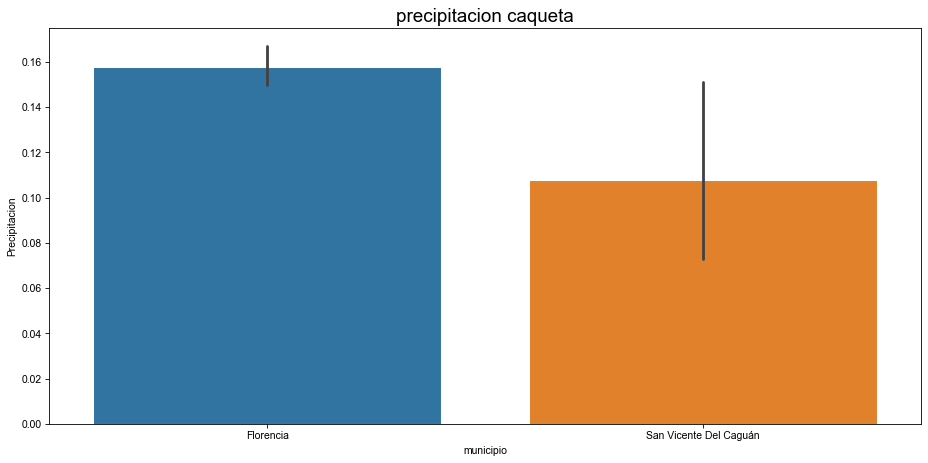

In [24]:
plt.subplots(figsize=(15,7),dpi=75)
sns.set_style('whitegrid')
plt.title('precipitacion caqueta', fontsize=18)
sns.barplot(x='Municipio', y ='Valor', data=df_precipitacion)
plt.ylabel("Precipitacion")
plt.xlabel("municipio")


In [25]:
df_precipitacion.groupby('Fecha')

In [26]:
list(df_precipitacion)

['CodigoEstacion',
 'NombreEstacion',
 'Latitud',
 'Longitud',
 'Altitud',
 'Categoria',
 'Entidad',
 'AreaOperativa',
 'Departamento',
 'Municipio',
 'FechaInstalacion',
 'FechaSuspension',
 'IdParametro',
 'Etiqueta',
 'Frecuencia',
 'Fecha',
 'Valor',
 'Grado',
 'Calificador',
 'NivelAprobacion']

In [27]:
lluvia=df_precipitacion[['CodigoEstacion',
 'Latitud',
 'Longitud',
 'Altitud',
 'Categoria',
 'Municipio',
 'FechaInstalacion',
 'FechaSuspension',
 'Frecuencia',
 'Fecha',
 'Valor',
 'Grado',
 'NivelAprobacion']]


In [28]:
lluvia.head(5)

,CodigoEstacion,Latitud,Longitud,Altitud,Categoria,Municipio,FechaInstalacion,FechaSuspension,Frecuencia,Fecha,Valor,Grado,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,
Precipitación total horaria (sensor medición cada 10 minutos),44037040,1.72525,-75.666389,600,Limnigráfica,Florencia,15/08/1964 00:00,NaN,Horaria,2017-01-01 11:00:00,0.0,50,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,1.72525,-75.666389,600,Limnigráfica,Florencia,15/08/1964 00:00,NaN,Horaria,2017-01-01 12:00:00,0.0,50,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,1.72525,-75.666389,600,Limnigráfica,Florencia,15/08/1964 00:00,NaN,Horaria,2017-01-01 13:00:00,0.0,50,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,1.72525,-75.666389,600,Limnigráfica,Florencia,15/08/1964 00:00,NaN,Horaria,2017-01-01 14:00:00,0.0,50,900
Precipitación total horaria (sensor medición cada 10 minutos),44037040,1.72525,-75.666389,600,Limnigráfica,Florencia,15/08/1964 00:00,NaN,Horaria,2017-01-01 15:00:00,0.0,50,900


In [29]:
lluvia.dtypes

CodigoEstacion               int64
Latitud                    float64
Longitud                   float64
Altitud                      int64
Categoria                   object
Municipio                   object
FechaInstalacion            object
FechaSuspension            float64
Frecuencia                  object
Fecha               datetime64[ns]
Valor                      float64
Grado                        int64
NivelAprobacion              int64
dtype: object

In [30]:
df_time=lluvia.groupby('Fecha').sum()
df_time.head(10)

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Fecha,,,,,,,,
2016-12-31 15:00:00,134085120,5.296,-226.067722,1180,0.0,0.0,150,2700
2016-12-31 16:00:00,134085120,5.296,-226.067722,1180,0.0,0.1,150,2700
2016-12-31 17:00:00,134085120,5.296,-226.067722,1180,0.0,8.6,150,2700
2016-12-31 18:00:00,134085120,5.296,-226.067722,1180,0.0,0.0,150,2700
2016-12-31 19:00:00,134085120,5.296,-226.067722,1180,0.0,3.8,150,2700
2016-12-31 20:00:00,134085120,5.296,-226.067722,1180,0.0,0.1,150,2700
2016-12-31 21:00:00,134085120,5.296,-226.067722,1180,0.0,0.3,150,2700
2016-12-31 22:00:00,134085120,5.296,-226.067722,1180,0.0,0.0,150,2700
2016-12-31 23:00:00,134085120,5.296,-226.067722,1180,0.0,0.0,150,2700


In [31]:
doceh=df_time.resample('12h').mean()
doceh.head(10)

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Fecha,,,,,,,,
2016-12-31 12:00:00,1.340851e+08,5.296000,-226.067722,1180.0,0.0,1.433333,150.000000,2700.0
2017-01-01 00:00:00,1.377549e+08,5.439771,-232.373255,1230.0,0.0,0.008333,154.166667,2775.0
2017-01-01 12:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.116667,200.000000,3600.0
2017-01-02 00:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.366667,191.500000,3600.0
2017-01-02 12:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.000000,200.000000,3600.0
2017-01-03 00:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.000000,200.000000,3600.0
2017-01-03 12:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.000000,200.000000,3600.0
2017-01-04 00:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.000000,200.000000,3600.0
2017-01-04 12:00:00,1.781222e+08,7.021250,-301.734111,1780.0,0.0,0.000000,200.000000,3600.0


Text(0.5, 0, 'Fecha')

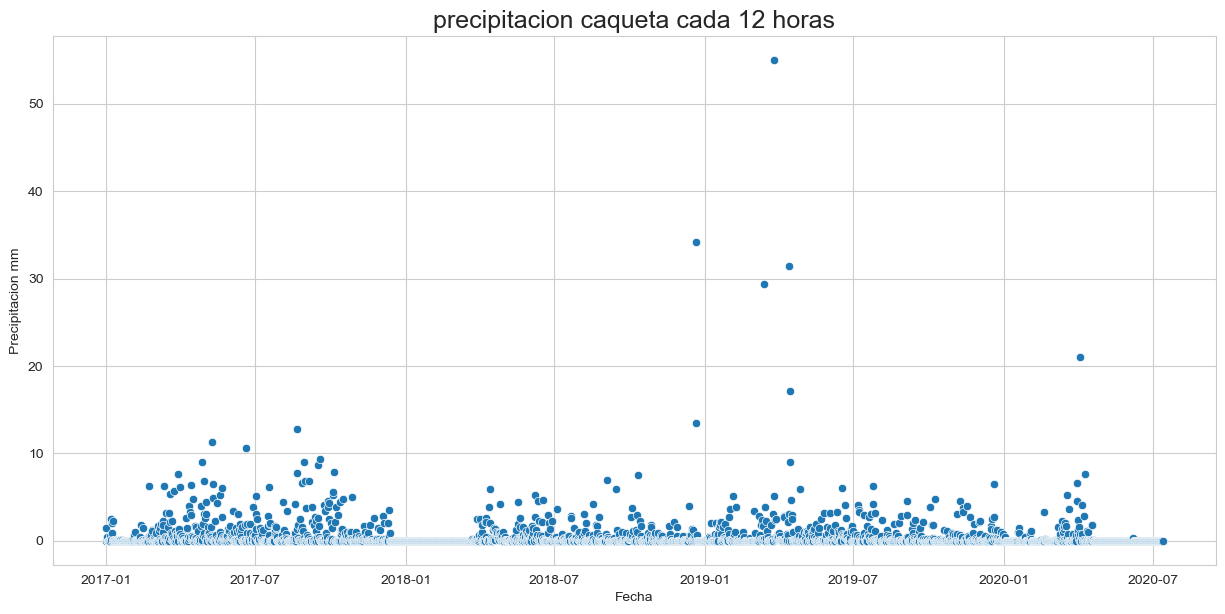

In [32]:
plt.subplots(figsize=(15,7),dpi=100)
sns.set_style('whitegrid')
plt.title('precipitacion caqueta cada 12 horas', fontsize=18)
sns.scatterplot(x='Fecha', y ='Valor', data=doceh)
plt.ylabel("Precipitacion mm")
plt.xlabel("Fecha")

In [33]:
mensual=df_time.resample('W').mean()
mensual.head(10)

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Fecha,,,,,,,,
2017-01-01,1.514330e+08,5.975644,-255.875694,1416.363636,0.0,0.436364,169.696970,3054.545455
2017-01-08,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.475000,197.267857,3600.000000
2017-01-15,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.169048,65.517857,3600.000000
2017-01-22,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.010119,84.339286,3600.000000
2017-01-29,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.000000,-4.000000,3600.000000
2017-02-05,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.126190,144.446429,3600.000000
2017-02-12,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.161310,199.392857,3600.000000
2017-02-19,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.148810,198.785714,3600.000000
2017-02-26,1.781222e+08,7.021250,-301.734111,1780.000000,0.0,0.801786,188.160714,3600.000000


Text(0.5, 0, 'Fecha')

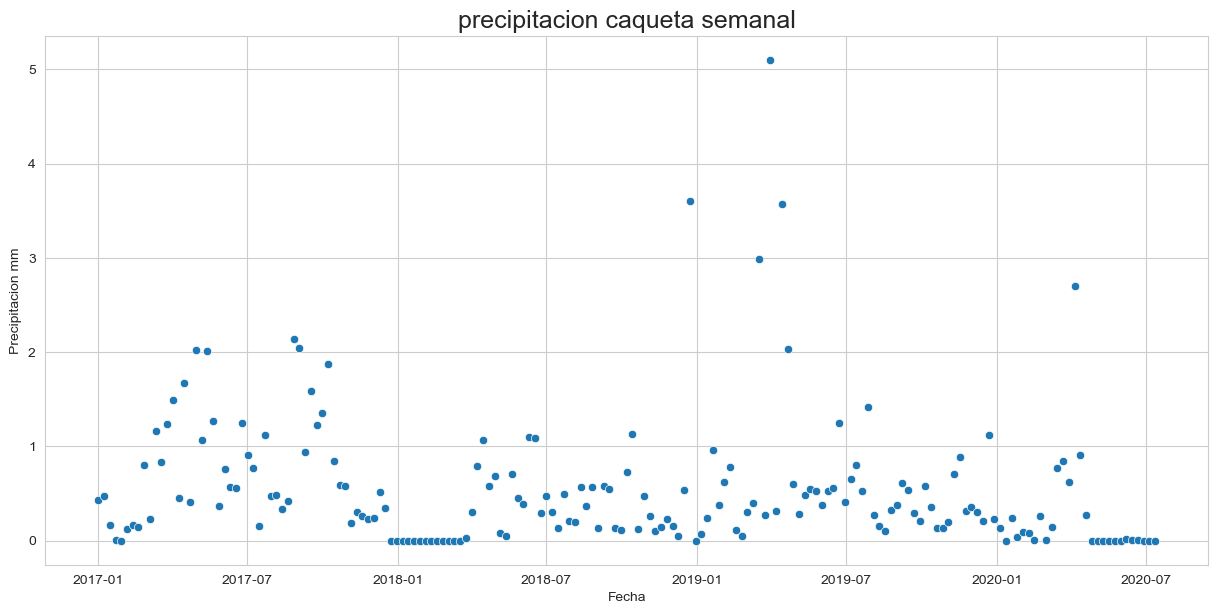

In [34]:
plt.subplots(figsize=(15,7),dpi=100)
sns.set_style('whitegrid')
plt.title('precipitacion caqueta semanal', fontsize=18)
sns.scatterplot(x='Fecha', y ='Valor', data=mensual)
plt.ylabel("Precipitacion mm")
plt.xlabel("Fecha")

 ## Humedad realativa

In [39]:
idx_h=df_parametro['IdParametro'].isin(['HUM RELATIVA']) # filtrado de precipitacion
idx_h

DescripcionSerie
Precipitación total horaria (sensor medición cada 10 minutos)    False
Precipitación total horaria (sensor medición cada 10 minutos)    False
Precipitación total horaria (sensor medición cada 10 minutos)    False
Precipitación total horaria (sensor medición cada 10 minutos)    False
Precipitación total horaria (sensor medición cada 10 minutos)    False
                                                                 ...  
Húmeda relativa calculada horaria                                 True
Húmeda relativa calculada horaria                                 True
Húmeda relativa calculada horaria                                 True
Húmeda relativa calculada horaria                                 True
Húmeda relativa calculada horaria                                 True
Name: IdParametro, Length: 130824, dtype: bool

In [42]:
df_hum=df_parametro[idx_h]
df_hum.sample(10)

,CodigoEstacion,NombreEstacion,Latitud,Longitud,Altitud,Categoria,Entidad,AreaOperativa,Departamento,Municipio,FechaInstalacion,FechaSuspension,IdParametro,Etiqueta,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
DescripcionSerie,,,,,,,,,,,,,,,,,,,,
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2013-03-07 19:00:00,90.0,50,NaN,900
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.500000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2015-04-17 07:00:00,95.0,50,NaN,900
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2017-04-02 13:00:00,65.0,50,NaN,900
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2014-07-12 13:00:00,76.0,50,NaN,900
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2016-03-15 13:00:00,77.0,50,NaN,900
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.500000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2014-10-22 13:00:00,74.0,50,NaN,900
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.500000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2015-01-01 19:00:00,80.0,50,NaN,900
Húmeda relativa calculada horaria,44035030,MACAGUAL [44035030],1.500000,-75.660000,280,Agrometeorológica,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,Florencia,15/02/1971 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2013-06-15 13:00:00,68.0,50,NaN,900
Húmeda relativa calculada horaria,46015020,SANTA ROSA CAGUAN [46015020],1.735472,-74.785056,240,Climática Ordinaria,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,Area Operativa 04 - Huila-Caquetá,Caqueta,San Vicente Del Caguán,15/09/1984 00:00,NaN,HUM RELATIVA,HR_CAL,Horaria,2018-05-21 19:00:00,87.0,50,NaN,900


In [45]:
df_hum.groupby('Fecha')

In [47]:
humedad=df_hum[['CodigoEstacion',
 'Latitud',
 'Longitud',
 'Altitud',
 'Categoria',
 'Municipio',
 'FechaInstalacion',
 'FechaSuspension',
 'Frecuencia',
 'Fecha',
 'Valor',
 'Grado',
 'NivelAprobacion']]

In [71]:
H_time=df_hum.groupby('Fecha').mean()
H_time.head(10)

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Fecha,,,,,,,,
2012-01-01 07:00:00,4.601502e+07,1.735472,-74.785056,240.000000,NaN,80.000000,50.0,900.0
2012-01-01 13:00:00,4.502502e+07,1.617736,-75.222528,260.000000,NaN,58.500000,50.0,900.0
2012-01-01 19:00:00,4.502502e+07,1.617736,-75.222528,260.000000,NaN,76.500000,50.0,900.0
2012-01-02 07:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,93.000000,50.0,900.0
2012-01-02 13:00:00,4.502502e+07,1.617736,-75.222528,260.000000,NaN,61.000000,50.0,900.0
2012-01-02 18:00:00,4.601503e+07,2.063000,-74.762694,300.000000,NaN,88.000000,50.0,900.0
2012-01-02 19:00:00,4.502502e+07,1.617736,-75.222528,260.000000,NaN,79.000000,50.0,900.0
2012-01-03 07:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,91.333333,50.0,900.0
2012-01-03 13:00:00,4.502502e+07,1.617736,-75.222528,260.000000,NaN,60.000000,50.0,900.0


### cada doce horas

In [72]:
doce_timer=H_time.resample('12h').mean()
doce_timer.head(10)

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Fecha,,,,,,,,
2012-01-01 00:00:00,4.601502e+07,1.735472,-74.785056,240.000000,NaN,80.000000,50.0,900.0
2012-01-01 12:00:00,4.502502e+07,1.617736,-75.222528,260.000000,NaN,67.500000,50.0,900.0
2012-01-02 00:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,93.000000,50.0,900.0
2012-01-02 12:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,76.000000,50.0,900.0
2012-01-03 00:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,91.333333,50.0,900.0
2012-01-03 12:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,71.666667,50.0,900.0
2012-01-04 00:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,94.333333,50.0,900.0
2012-01-04 12:00:00,4.502503e+07,1.726912,-75.215074,280.000000,NaN,73.666667,50.0,900.0
2012-01-05 00:00:00,4.535503e+07,1.766157,-75.069250,273.333333,NaN,93.666667,50.0,900.0


In [73]:
h=doce_timer.fillna(0)
h

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Fecha,,,,,,,,
2012-01-01 00:00:00,4.601502e+07,1.735472,-74.785056,240.000000,0.0,80.000000,50.0,900.0
2012-01-01 12:00:00,4.502502e+07,1.617736,-75.222528,260.000000,0.0,67.500000,50.0,900.0
2012-01-02 00:00:00,4.535503e+07,1.766157,-75.069250,273.333333,0.0,93.000000,50.0,900.0
2012-01-02 12:00:00,4.535503e+07,1.766157,-75.069250,273.333333,0.0,76.000000,50.0,900.0
2012-01-03 00:00:00,4.535503e+07,1.766157,-75.069250,273.333333,0.0,91.333333,50.0,900.0
...,...,...,...,...,...,...,...,...
2020-09-28 12:00:00,4.403503e+07,1.500000,-75.660000,280.000000,0.0,74.500000,50.0,900.0
2020-09-29 00:00:00,4.403503e+07,1.500000,-75.660000,280.000000,0.0,96.000000,50.0,900.0
2020-09-29 12:00:00,4.403503e+07,1.500000,-75.660000,280.000000,0.0,90.500000,50.0,900.0


In [75]:
hr=h['Valor'].values
hr

array([80. , 67.5, 93. , ..., 90.5, 95. , 90.5])

In [76]:
np.max(hr) #maximo

100.0

In [77]:
np.min(hr) # minimo

0.0

In [78]:
np.std(hr)

32.806583330584665

## Municipios

In [82]:
Municipioh=df_hum.groupby('Municipio').mean()
Municipioh

,CodigoEstacion,Latitud,Longitud,Altitud,FechaSuspension,Valor,Grado,NivelAprobacion
Municipio,,,,,,,,
Florencia,4.403503e+07,1.500000,-75.660000,280.000000,NaN,84.759428,50.0,900.0
San Vicente Del Caguán,4.601502e+07,1.737865,-74.784892,240.438348,NaN,82.421202,50.0,900.0


### graficas

No handles with labels found to put in legend.


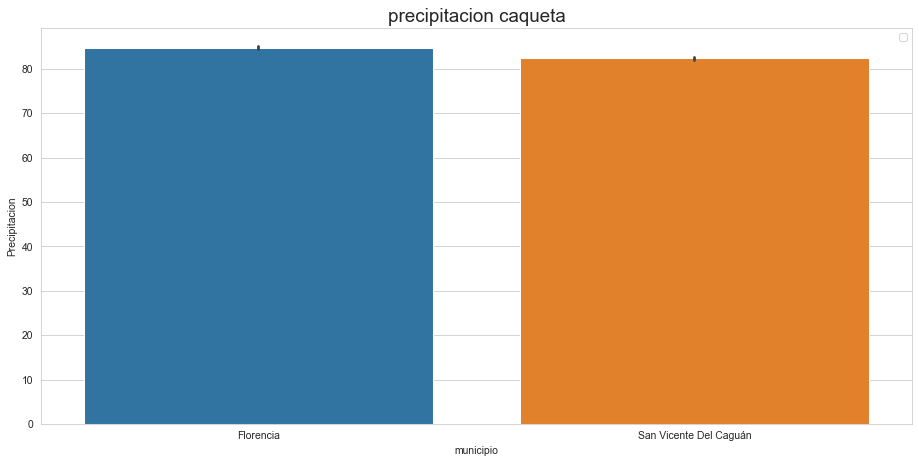

In [90]:
plt.subplots(figsize=(15,7),dpi=75)
sns.set_style('whitegrid')
plt.title('precipitacion caqueta', fontsize=18)
sns.barplot(x='Municipio', y ='Valor', data=df_hum)
plt.ylabel("humedad relativa")
plt.xlabel("municipio")
plt.legend()

No handles with labels found to put in legend.


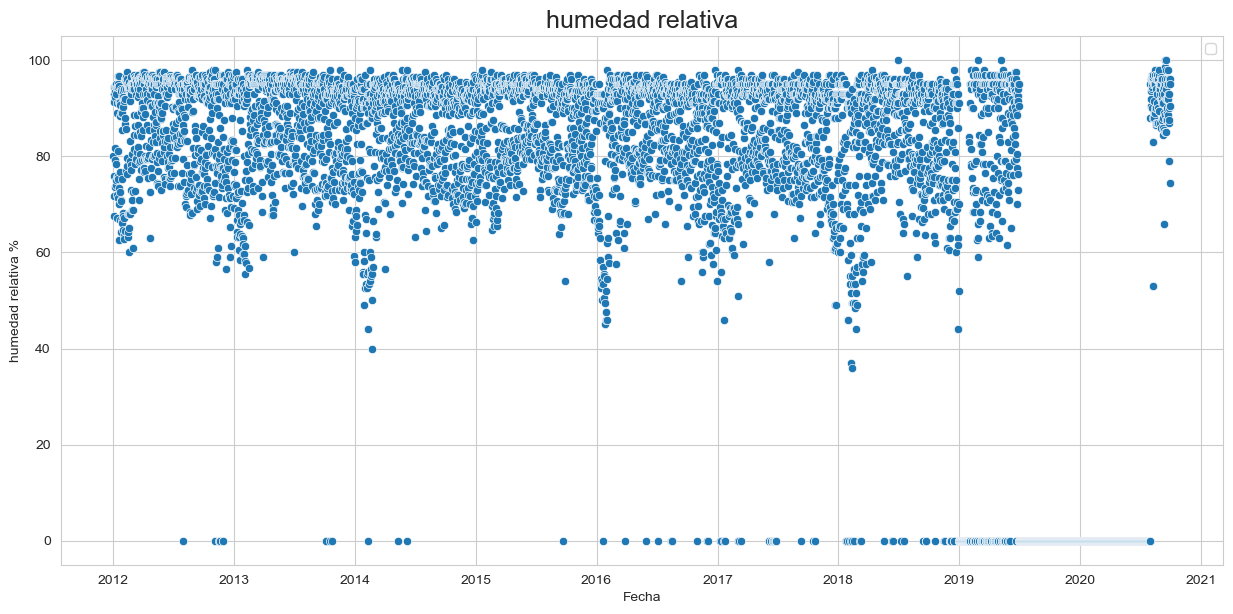

In [89]:
plt.subplots(figsize=(15,7),dpi=100)
sns.set_style('whitegrid')
plt.title('humedad relativa', fontsize=18)
sns.scatterplot(x='Fecha', y ='Valor', data=h)
plt.ylabel("humedad relativa %")
plt.xlabel("Fecha")
plt.legend()